In [7]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataframe = pd.read_csv('heart_disease_dataset_UCI.csv')

For complete dataset description you can visit this site https://archive.ics.uci.edu/ml/datasets/heart+disease


# Data Exploration

In [8]:
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
dataframe.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


# Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

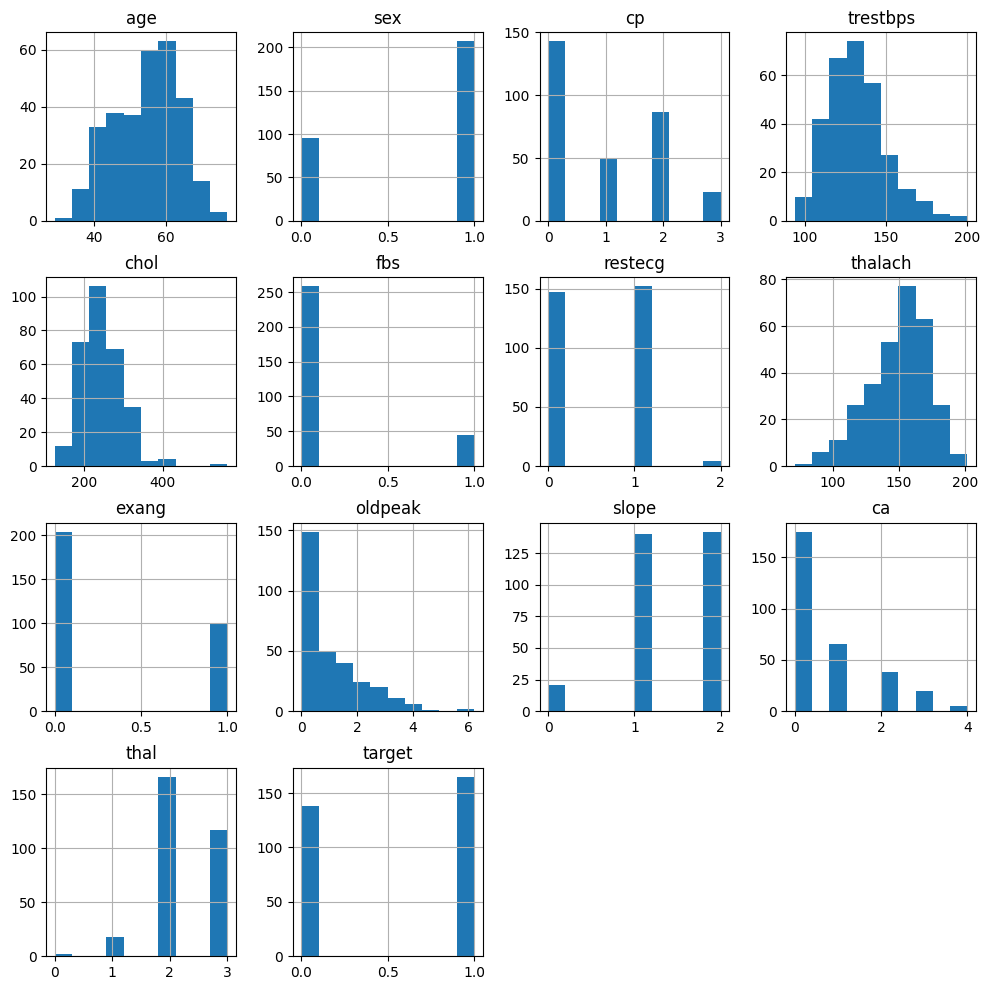

In [12]:
dataframe.hist(figsize=(12,12))

# Data Pre Processing

In [13]:
X = dataframe.iloc[:,0:13]
y = dataframe.iloc[:,13]
X = X.values
y = y.values
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_std,y,test_size=0.25,random_state=40)

# Model Prediction

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(C=1.0,class_weight='balanced',max_iter=100,penalty='l2',random_state=1234,solver='lbfgs',tol=0.0001)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [16]:
model1=lr.fit(X_train,y_train)
model1.score(X_train, y_train)


0.8458149779735683

In [17]:
prediction1=model1.predict(X_test)

<Axes: >

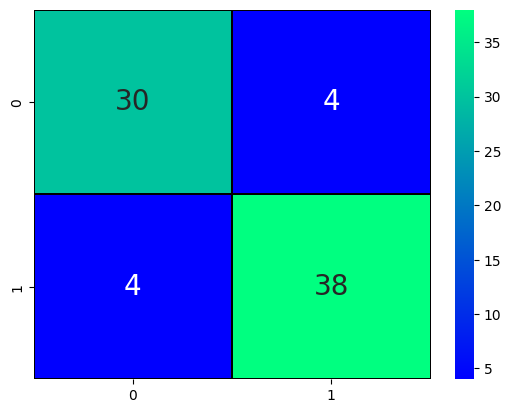

In [18]:
# Confusion Matrix
cm=confusion_matrix(y_test,prediction1)
sns.heatmap(cm,annot=True,cmap='winter',linewidths=0.3,
linecolor='black',annot_kws={"size":20})

In [19]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression',(TP/(TP+FP)))

Testing Accuracy for Logistic Regression: 0.8947368421052632
Testing Sensitivity for logistic Regression: 0.8823529411764706
Testing Specificity for Logistic Regression: 0.9047619047619048
Testing Precision for Logistic Regression 0.8823529411764706


**Precision** basically tells us that out of the results classified as positive by our model, how many were actually positive.

**Recall/ Sensitivity** tells us how many true positives (points labelled as positive) were recalled or found by our model.

# References
https://www.analyticsvidhya.com/blog/2022/03/logistic-regression-on-uci-dataset/


https://www.kaggle.com/code/arviinndn/heart-disease-prediction-uci-dataset/notebook


**Lab Tasks:**
1. Use HeartDisease dataset and apply LinearRegression and then pass the result to
sigmoid function (write from scratch) and then compare the accuracy of both models.

2. Calculate binary cross entropy loss on the above experiment. Write from scratch.

3. Download a new dataset from UCI Repository https://archive.ics.uci.edu/ml/datasets.php
and evaluate its accuracy on 5 cross fold.

4. Consider a logistic regression model with w1=0.5 and w2=0.31 and b=0.09. X1 = 5, X2
= 3 and actual y is 1. Calculate this numerical by hand and verify your answers by
coding the functions below.
Write below functions from scratch:
● ForwardPropagation()
● LossCalculation()
● BackwardPropagation() # This function must update the old weights
● MainLoop which must iterate 5 times and call all the above functions.

In [32]:
# Load dataset
data = pd.read_csv('heart_disease_dataset_UCI.csv')
X = data.drop(columns=['target'])  # Assuming 'target' is the column to predict
y = data['target']

In [33]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Task#1**

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [35]:
from sklearn.linear_model import LinearRegression, LogisticRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_train_linear = linear_model.predict(X_test)

In [36]:
#sigmoid function
def sigmoid(x):
  return 1/(1+np.exp(-x))


from sklearn.metrics import accuracy_score

y_pred_sigmoid = sigmoid(y_pred_train_linear)
y_pred_binary = (y_pred_sigmoid >= 0.5).astype(int)

accuracy_linear_sigmoid = accuracy_score(Y_test, y_pred_binary)
print(f'Accuracy of Linear Regression with Sigmoid: {accuracy_linear_sigmoid:.4f}')


Accuracy of Linear Regression with Sigmoid: 0.5738


In [37]:
LogisticModel = LogisticRegression(max_iter=500, solver='saga')
LogisticModel.fit(X_train, Y_train)
y_pred_test_logistic = LogisticModel.predict(X_test)


accuracy_logistic = accuracy_score(Y_test, y_pred_test_logistic)
print(f'Accuracy of Logistic Regression: {accuracy_logistic:.4f}')

Accuracy of Logistic Regression: 0.8689


In [38]:
# Compare results
print(f'Accuracy Difference: {accuracy_logistic - accuracy_linear_sigmoid:.4f}')

Accuracy Difference: 0.2951


**Task#2**

In [39]:
def binary_cross_entropy(y, y_pred):
  epsilon = 1e-15
  y_pred = np.clip(y_pred, epsilon, 1-epsilon)
  return -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))


bce_loss_linear = binary_cross_entropy(Y_test, y_pred_sigmoid)
print(f'Binary Cross-Entropy Loss (Linear Regression + Sigmoid): {bce_loss_linear:.4f}')

bce_loss_logistic = binary_cross_entropy(Y_test, LogisticModel.predict_proba(X_test)[:, 1])
print(f'Binary Cross-Entropy Loss (Logistic Regression): {bce_loss_logistic:.4f}')

Binary Cross-Entropy Loss (Linear Regression + Sigmoid): 0.6067
Binary Cross-Entropy Loss (Logistic Regression): 0.2897


**Task#3**

In [41]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets




In [42]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = LinearRegression()

cv_scores = []


for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_fold, y_train_fold)
    y_val_pred_fold = model.predict(X_val_fold)

    mse_fold = mean_squared_error(y_val_fold, y_val_pred_fold)
    cv_scores.append(mse_fold)
    print(f"Fold {fold + 1}: Mean Squared Error on Validation Set: {mse_fold}")

print(f'\nCross-validation scores: {cv_scores}')
print(f'Average MSE: {np.mean(cv_scores):.4f}')


y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"\nMean Squared Error on Test Set: {mse_test}")


Fold 1: Mean Squared Error on Validation Set: 0.5506450248567712
Fold 2: Mean Squared Error on Validation Set: 0.6053534395174003
Fold 3: Mean Squared Error on Validation Set: 0.5527447033503023
Fold 4: Mean Squared Error on Validation Set: 0.5049041294861533
Fold 5: Mean Squared Error on Validation Set: 0.523273406168213

Cross-validation scores: [0.5506450248567712, 0.6053534395174003, 0.5527447033503023, 0.5049041294861533, 0.523273406168213]
Average MSE: 0.5474

Mean Squared Error on Test Set: 0.5336959214985676


**Task#4**

In [45]:
def ForwardPropagation(X1, X2, w1, w2, b):
    z = (w1 * X1) + (w2 * X2) + b
    a = sigmoid(z)
    return a



def BackwardPropagation(X1, X2, a, y, w1, w2, b, learning_rate=0.1):
    dz = a - y  # Gradient of loss w.r.t. activation
    dw1 = dz * X1
    dw2 = dz * X2
    db = dz

    # Update weights
    w1 -= learning_rate * dw1
    w2 -= learning_rate * dw2
    b -= learning_rate * db

    return w1, w2, b



def LossCalculation(a, y):
    loss = - (y * np.log(a) + (1 - y) * np.log(1 - a))
    return loss



def MainLoop(X1, X2, y, w1, w2, b, loops=5):
    for i in range(loops):
        print(f'Iteration {i+1}:')
        a = ForwardPropagation(X1, X2, w1, w2, b)
        loss = LossCalculation(a, y)
        print(f'Prediction: {a:.4f}, Loss: {loss:.4f}')
        w1, w2, b = BackwardPropagation(X1, X2, a, y, w1, w2, b)
        print(f'Updated Weights -> w1: {w1:.4f}, w2: {w2:.4f}, b: {b:.4f}\n')


In [46]:
# Initialize variables
w1, w2, b = 0.5, 0.31, 0.09
X1, X2, y = 5, 3, 1

# Run training loop
MainLoop(X1, X2, y, w1, w2, b)

Iteration 1:
Prediction: 0.9713, Loss: 0.0292
Updated Weights -> w1: 0.5144, w2: 0.3186, b: 0.0929

Iteration 2:
Prediction: 0.9739, Loss: 0.0264
Updated Weights -> w1: 0.5274, w2: 0.3264, b: 0.0955

Iteration 3:
Prediction: 0.9762, Loss: 0.0241
Updated Weights -> w1: 0.5393, w2: 0.3336, b: 0.0979

Iteration 4:
Prediction: 0.9780, Loss: 0.0222
Updated Weights -> w1: 0.5503, w2: 0.3402, b: 0.1001

Iteration 5:
Prediction: 0.9796, Loss: 0.0206
Updated Weights -> w1: 0.5605, w2: 0.3463, b: 0.1021

